In [1]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [3]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [4]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [1]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'dystopia' in data[key]['keywords'] or 'post apocalypse' in data[key]['keywords']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 3).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

NameError: name 'defaultdict' is not defined

In [6]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1973: 5, 1974: 1, 1975: 3, 1977: 2, 1979: 1, 1980: 1, 1982: 2, 1984: 6, 1985: 5, 1986: 1, 1987: 1, 1988: 4, 1989: 2, 1990: 8, 1991: 2, 1992: 1, 1993: 5, 1995: 7, 1996: 6, 1997: 3, 1998: 2, 1999: 4, 2000: 1, 2001: 4, 2002: 2, 2003: 4, 2004: 2, 2005: 1, 2006: 4, 2007: 9, 2008: 7, 2009: 9, 2010: 4, 2011: 6, 2012: 10, 2013: 9, 2014: 7, 2015: 7, 2016: 1}})

In [7]:
history_df

,count,rolling mean,difference from mean
1980,1,NaN,NaN
1981,0,NaN,NaN
1982,2,NaN,NaN
1983,0,NaN,NaN
1984,6,NaN,NaN
1985,5,1.8,2.777778
1986,1,2.6,0.384615
1987,1,2.8,0.357143
1988,4,2.6,1.538462
1989,2,3.4,0.588235


In [5]:
df = history_df.reset_index()
df['cutoff'] = 1.5
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
ax = plt.plot(date, count, 'r-', date, rolling_mean, 'b-', date, difference_mean, 'g-', date, cutoff, 'y-')
plt.legend(['r-', 'b-'],  ["Movies Released", "5"])
plt.show()

NameError: name 'history_df' is not defined

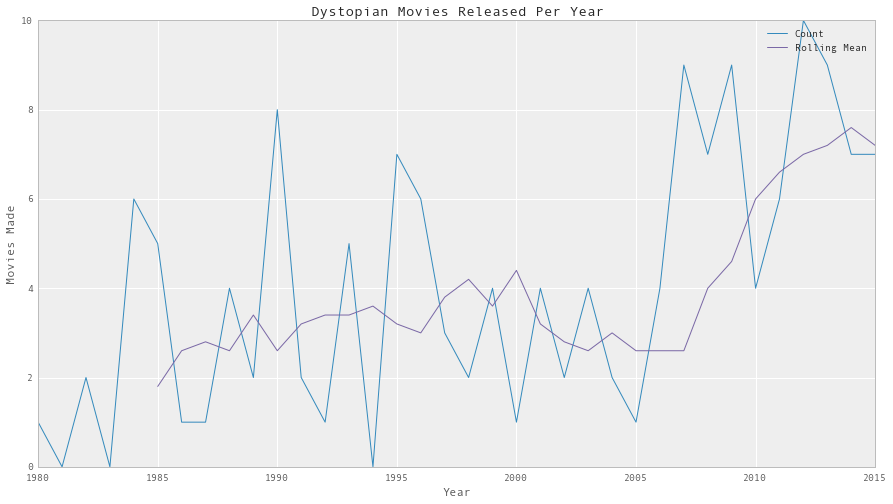

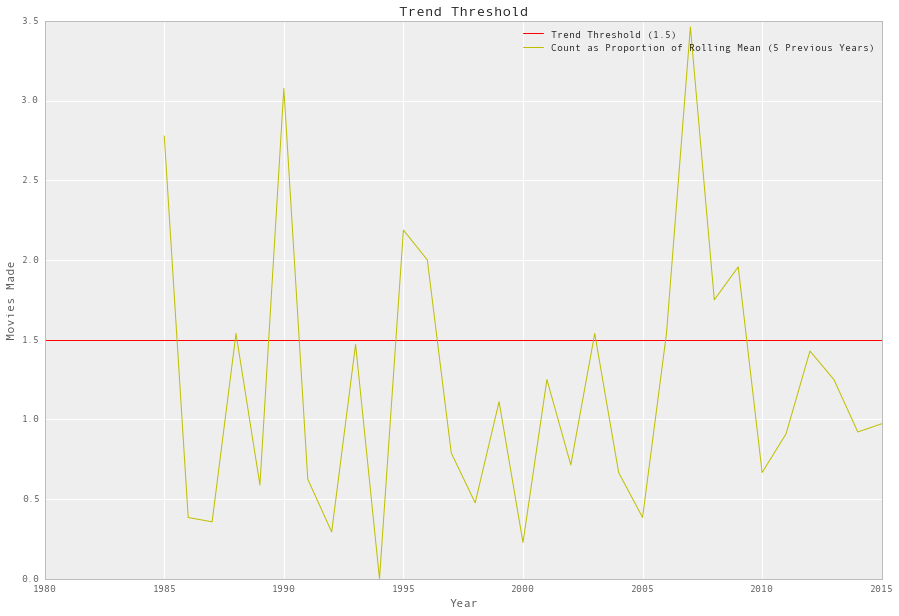

In [16]:
df = history_df.reset_index()
df['cutoff'] = 1.5
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
count_line = plt.plot(date, count, label=count)
rolling_mean_line = plt.plot(date,rolling_mean, label=rolling_mean)
plt.legend(['Count','Rolling Mean'])
plt.title('Dystopian Movies Released Per Year')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

# red dashes, blue squares and green triangles
figure(figsize=(15,10))
count_line = plt.plot(date, cutoff, 'r-', label=count)
rolling_mean_line = plt.plot(date, difference_mean, 'y-', label=count)
plt.legend(['Trend Threshold (1.5)', 'Count as Proportion of Rolling Mean (5 Previous Years)'])
plt.title('Trend Threshold')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

In [10]:
history_dic

NameError: name 'history_dic' is not defined

In [17]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [18]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

NameError: name 'history_dic' is not defined

In [14]:

trend = genre1[48:58]

trend

NameError: name 'genre1' is not defined

In [11]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

NameError: name 'trend' is not defined

In [12]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2003-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 'Winter'
    if x in [5, 6, 7, 8]:
        return 'Summer'
    if x in [9, 10,]:
        return 'Fall'
    if x in [2, 3, 4,]:
        return 'Spring'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season + level_0', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



NameError: name 'trend' is not defined

In [13]:
model.fit().summary()

NameError: name 'model' is not defined

In [42]:
#trend = trend.reset_index()
with open('dystopian_df.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)

In [41]:
trend

,index,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
0,48,2003,28 Days Later...,2003-06-27,1260,10061858,7985.601587,177 days 00:00:00,177,Summer
1,49,2003,The Matrix Revolutions,2003-11-05,3502,48475154,13842.134209,308 days 00:00:00,308,Winter
2,50,2004,"I, Robot",2004-07-16,3420,52179887,15257.276901,562 days 00:00:00,562,Summer
3,52,2006,Ultraviolet,2006-03-03,2558,9064880,3543.737295,1157 days 00:00:00,1157,Spring
4,53,2006,V for Vendetta,2006-03-17,3365,25642340,7620.309064,1171 days 00:00:00,1171,Spring
5,51,2006,District B13,2006-06-02,151,411544,2725.456954,1248 days 00:00:00,1248,Summer
6,57,2007,The Condemned,2007-04-27,231,3807595,16483.095238,1577 days 00:00:00,1577,Spring
7,54,2007,28 Weeks Later,2007-05-11,2303,9807292,4258.485454,1591 days 00:00:00,1591,Summer
8,55,2007,Resident Evil: Extinction,2007-09-21,2828,23678580,8372.906648,1724 days 00:00:00,1724,Fall
9,56,2007,Southland Tales,2007-12-07,63,123428,1959.174603,1801 days 00:00:00,1801,Winter
